<a href="https://colab.research.google.com/github/RazvanGolan/Faculty-3rd-year/blob/main/bia/lab5/exercises5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
[0.92461872 0.05306648 0.01710261]


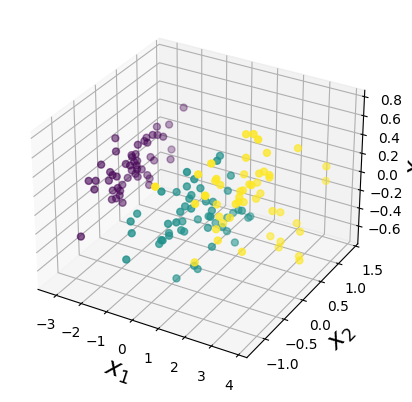

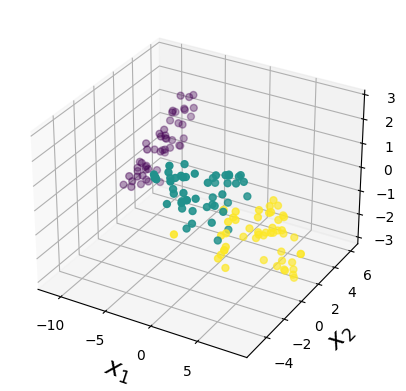

In [1]:
# exercise 1

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

pca = PCA(n_components=3)
X3D = pca.fit_transform(X)

print(pca.components_)
print(pca.explained_variance_ratio_)

def make_plot(X3D):
  fig = plt.figure(figsize=(6, 3.8), constrained_layout=True)
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(X3D[:, 0], X3D[:, 1], X3D[:, 2], c=y, s = 25)

  ax.set_xlabel("$x_1$", fontsize=18)
  ax.set_ylabel("$x_2$", fontsize=18)
  ax.set_zlabel("$x_3$", fontsize=18)

  plt.show()

tsne = TSNE(n_components=3)
X_reduced_tsne = tsne.fit_transform(X)

make_plot(X3D)
make_plot(X_reduced_tsne)

In [2]:
# exercise 2

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time

digits = load_digits()

X = digits["data"]
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

svm_clf = SVC(kernel="linear", C=5)

start = time.time()
svm_clf.fit(X_train, y_train)
end = time.time()

training_time_normal = end - start

print(f'Training time for normal model: {training_time_normal}')

pca = PCA(n_components=20)
X20D = pca.fit_transform(X_train)
X20D_test = pca.transform(X_test)

svm_clf_pca = SVC(kernel="linear", C=5)

start = time.time()
svm_clf_pca.fit(X20D, y_train)
end = time.time()

training_time_pca = end - start

print(f'Training time for transformed model: {training_time_pca}')

score_normal = svm_clf.score(X_test, y_test)
print(f'Accuracy score for normal model: {score_normal}')

score_pca = svm_clf_pca.score(X20D_test, y_test)
print(f'Accuracy score for transformed model: {score_pca}')

print(f'\nDifferences: ')
print(f'Training: {training_time_normal - training_time_pca}')
print(f'Accuracy: {score_normal - score_pca}')

Training time for normal model: 0.117431640625
Training time for transformed model: 0.12182474136352539
Accuracy score for normal model: 0.9888888888888889
Accuracy score for transformed model: 0.9666666666666667

Differences: 
Training: -0.004393100738525391
Accuracy: 0.022222222222222254
